In [14]:
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import matplotlib as mp
import matplotlib.pyplot as mplt
import seaborn as sn
from scipy import stats

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix , classification_report , f1_score, roc_auc_score

In [48]:
from sklearn.metrics import precision_score, recall_score

In [50]:
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('trainf.csv')

In [3]:
df.shape

(590537, 138)

In [4]:
df.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3',
       'card5', 'addr1', 'addr2', 'dist1',
       ...
       'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19',
       'id_20', 'id_32'],
      dtype='object', length=138)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590537 entries, 0 to 590536
Columns: 138 entries, isFraud to id_32
dtypes: float64(135), int64(3)
memory usage: 621.8 MB


In [6]:
# we need to set class weights because of the imbalanced nature of the dataset

df['isFraud'].value_counts()/df.shape[0]

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

We see that 96.5% are legit transactions and the remaining 3.5% are fraud transactions.
We can set the class weights of LogReg to represent this imbalancedness. 

In [27]:
wt = {0:1, 1:96.5}

# 1. Split data into x and y
# 2. Standardize x

In [7]:
x = df.drop(columns=['isFraud'], axis=1)
y = df['isFraud']

In [8]:
standard = StandardScaler()
x_sc = standard.fit_transform(x)

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.20, random_state=42, stratify=y)

# 3. Logistic Regression

## Logistic Regression only

In [10]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\leobu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = model.predict(x_test)

In [15]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Area Under Curve:', roc_auc_score(y_test, y_pred))
print('f1 score:', f1_score(y_test,y_pred))

Accuracy Score: 0.9682747993362008
Confusion Matrix: 
 [[113775    200]
 [  3547    586]]
Area Under Curve: 0.5700154285450746
f1 score: 0.23825980890424883


## LogisticRegression with max_iters as a hyperparameter

In [16]:
itrt = [100,200,500,1000]

In [21]:
model1 = GridSearchCV(LogisticRegression(),{ 'max_iter': [100,200,500,1000] }, scoring = 'f1', cv=5)
model1.fit(x_train, y_train)

C:\Users\leobu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leobu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 500, 1000]}, scoring='f1')

In [22]:
model1.best_estimator_

LogisticRegression()

In [26]:
prnt = pd.DataFrame(model1.cv_results_)
prnt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.714102,1.327632,0.060761,0.005885,100,{'max_iter': 100},0.227796,0.214194,0.243964,0.237427,0.236768,0.232030,0.010296,1
1,16.678331,1.097600,0.064530,0.008202,200,{'max_iter': 200},0.227738,0.214249,0.243580,0.237427,0.236768,0.231952,0.010193,2
2,16.899772,1.524382,0.062915,0.005262,500,{'max_iter': 500},0.227738,0.214249,0.243580,0.237427,0.236768,0.231952,0.010193,2
3,18.140551,2.165768,0.064908,0.002350,1000,{'max_iter': 1000},0.227738,0.214249,0.243580,0.237427,0.236768,0.231952,0.010193,2


In [23]:
y_pred1 = model.predict(x_test)

In [24]:
print('Accuracy Score:', accuracy_score(y_test,y_pred1))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred1))
print('Area Under Curve:', roc_auc_score(y_test, y_pred1))
print('f1 score:', f1_score(y_test,y_pred1))

Accuracy Score: 0.9682747993362008
Confusion Matrix: 
 [[113775    200]
 [  3547    586]]
Area Under Curve: 0.5700154285450746
f1 score: 0.23825980890424883


We see that number of iterations has barely any influence on the model output so we will restrict number of iterations to 250 going forward.

## Logistic Regression with only C or inverse Lambda parameter with max_iter limited to 250

In [29]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

In [36]:
# tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model2 = GridSearchCV(LogisticRegression( max_iter = 250 ), tuned_parameters, scoring = 'f1', cv=5)
model2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=250),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}], scoring='f1')

In [37]:
print(model2.best_estimator_)

LogisticRegression(C=10000, max_iter=250)


In [38]:
y_pred2 = model2.predict(x_test)

In [39]:
print('Accuracy Score:', accuracy_score(y_test,y_pred2))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred2))
print('Area Under Curve:', roc_auc_score(y_test, y_pred2))
print('f1 score:', f1_score(y_test,y_pred2))

Accuracy Score: 0.9682578656822569
Confusion Matrix: 
 [[113775    200]
 [  3549    584]]
Area Under Curve: 0.5697734735487039
f1 score: 0.2375432174089892


## Logistic regression with class weights

In [40]:
# defined above : wt = {0:1, 1:96.5}

C is inverse of Lambda (Regularization strength). Therefore, as C inc, Lambda decreases and Logistic Regression overfits
and, as C dec, Lambda inc and hence LR underfits

In [31]:
model3 = GridSearchCV(LogisticRegression(class_weight = wt , max_iter = 250), tuned_parameters, scoring = 'f1', cv=5)

model3.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 1, 1: 96.5},
                                          max_iter=250),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}], scoring='f1')

In [33]:
print(model3.best_estimator_)

LogisticRegression(C=10000, class_weight={0: 1, 1: 96.5}, max_iter=250)


In [34]:
y_pred3 = model3.predict(x_test)

In [35]:
print('Accuracy Score:', accuracy_score(y_test,y_pred3))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred3))
print('Area Under Curve:', roc_auc_score(y_test, y_pred3))
print('f1 score:', f1_score(y_test,y_pred3))

Accuracy Score: 0.36490330883598066
Confusion Matrix: 
 [[39200 74775]
 [  235  3898]]
Area Under Curve: 0.643537824666959
f1 score: 0.09414776707001908


We can see that accurcy drops from 96% to 36%. This can be accounted by the imbalanced data. But also it seems that since the class_weights don't sum upto to 1, it is basically changing the regularization parameter.

Let's try one more model keeping max_iter = 250 and changing the class weights as follows:

there are 96.5% of legit transactions and 3.5% of fraud transactions

We will invert the weights

## Logistic Regression with different weights

In [55]:
wt2 = { 0:0.035 , 1:0.965 }

the weights sum up to 1 : 0.035 + 0.965 = 1

In [56]:
# we also see in the best_estimator_ of both model2 and model3 that C=10**4 is the best estimator
# given this we will increase the regularization strength (or decrease it since lambda is inverse of C)

tuned_parameters2 = [{'C': [10**4, 10**6, 10**8]}]

In [57]:
model4 = GridSearchCV(LogisticRegression(class_weight = wt2 , max_iter = 250), tuned_parameters2, scoring = 'f1', cv=5)

model4.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 0.035, 1: 0.965},
                                          max_iter=250),
             param_grid=[{'C': [10000, 1000000, 100000000]}], scoring='f1')

In [58]:
print(model4.best_estimator_)

LogisticRegression(C=10000, class_weight={0: 0.035, 1: 0.965}, max_iter=250)


In [59]:
y_pred4 = model4.predict(x_test)

In [60]:
print('Accuracy Score:', accuracy_score(y_test,y_pred4))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred4))
print('Area Under Curve:', roc_auc_score(y_test, y_pred4))
print('f1 score:', f1_score(y_test,y_pred4))

Accuracy Score: 0.7803366410404037
Confusion Matrix: 
 [[89255 24720]
 [ 1224  2909]]
Area Under Curve: 0.7434787078276395
f1 score: 0.1831748630438889


Precision = TP / (TP+FP) i.e how many of the predicted positives are actually Positive

Recall = TP / (TP+FN) i.e how many actual positives were predicted or simply True Positive Rate

In [61]:
print('Precision: ', precision_score(y_test,y_pred4))
print('Recall: ', recall_score(y_test,y_pred4))

Precision:  0.10528792211082558
Recall:  0.7038470844422937


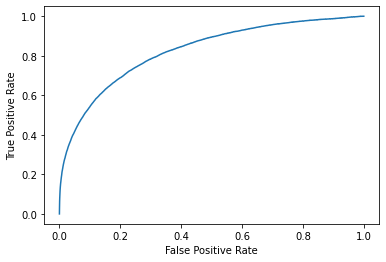

In [62]:
# plot ROC : FPR (x) vs TPR (y)

y_pred_prob = model4.predict_proba(x_train)[::,1]
fpr, tpr, _ = roc_curve(y_train,  y_pred_prob)

mplt.plot(fpr,tpr)
mplt.ylabel('True Positive Rate')
mplt.xlabel('False Positive Rate')
mplt.show()

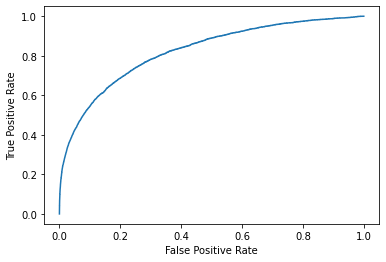

In [63]:
y_pred_prob1 = model4.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_prob1)

mplt.plot(fpr1,tpr1)
mplt.ylabel('True Positive Rate')
mplt.xlabel('False Positive Rate')
mplt.show()

### Clearly, scores of model3 and model4 show that model4 has improved accuracy, f1

We need to still improve the f1 score and
### so we will try using a different model

We cannot imporve on LogReg too much as can be seen from the best estimator parameters. C=10^4 is the best regularization strength

# 4. Random Forest

It is a famous bagging technique that uses bootstrapped samples from the data and and applies a different model on EACH of these bootstrapped samples. The majority vote taken from the output of each of these sampled models is the output of the RF classifier.

It eliminates variance, i.e prevents/minimizes overfitting and also solves the problem of deep DTs causing high variance(overfit)

In [64]:
# criterion will be kept default, i.e Gini Impurity because of its computational efficiency over entropy

model5 = RandomForestClassifier(n_estimators = 50, class_weight = wt2)
model5.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.035, 1: 0.965}, n_estimators=50)

In [65]:
y_pred5 = model5.predict(x_test)

In [66]:
print("F1 Score:",f1_score(y_test, y_pred5))
print('Precision: ', precision_score(y_test,y_pred5))
print('Recall: ', recall_score(y_test,y_pred5))

F1 Score: 0.5860000000000001
Precision:  0.9416175682913765
Recall:  0.42535688361964674


In [67]:
print('Accuracy Score:', accuracy_score(y_test,y_pred5))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred5))
print('Area Under Curve:', roc_auc_score(y_test, y_pred5))

Accuracy Score: 0.9789684018017408
Confusion Matrix: 
 [[113866    109]
 [  2375   1758]]
Area Under Curve: 0.7122002667714378


### RF with default estimators, i.e 100, with the same weights

In [68]:
model6 = RandomForestClassifier(class_weight = wt2)
model6.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.035, 1: 0.965})

In [69]:
y_pred6 = model6.predict(x_test)

In [70]:
print("F1 Score:",f1_score(y_test, y_pred6))
print('Precision: ', precision_score(y_test,y_pred6))
print('Recall: ', recall_score(y_test,y_pred6))

F1 Score: 0.6
Precision:  0.9434353918007266
Recall:  0.4398741834018873


In [71]:
print('Accuracy Score:', accuracy_score(y_test,y_pred6))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred6))
print('Area Under Curve:', roc_auc_score(y_test, y_pred6))

Accuracy Score: 0.9794764114200563
Confusion Matrix: 
 [[113866    109]
 [  2315   1818]]
Area Under Curve: 0.7194589166625581


### Since we some improvement in the scores, let us increase n_estimators

In [76]:
model7 = RandomForestClassifier(n_estimators = 200 , class_weight = wt2)
model7.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.035, 1: 0.965}, n_estimators=200)

In [89]:
y_pred7 = model7.predict(x_test)

In [90]:
print("F1 Score:",f1_score(y_test, y_pred7))
print('Precision: ', precision_score(y_test,y_pred7))
print('Recall: ', recall_score(y_test,y_pred7))

F1 Score: 0.5925311203319501
Precision:  0.943446088794926
Recall:  0.43188966852165495


In [91]:
print('Accuracy Score:', accuracy_score(y_test,y_pred7))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred7))
print('Area Under Curve:', roc_auc_score(y_test, y_pred7))

Accuracy Score: 0.9792139397839266
Confusion Matrix: 
 [[113868    107]
 [  2348   1785]]
Area Under Curve: 0.7154754330763572


We see that increasing n_estimators has not improved our RF models performance and therefore we will keep it as it is, i.e default.

# 5. XGBoost

We see from XGBoost's documentation that there is a parameter lambda i.e. inverse of C or simply put, the regularization strength of L2 penalty.

We can use the value of C (taken as inverse) and fed to the XGBoost classifier

### Base XGBoost

In [80]:
model8 = XGBClassifier()
model8.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [83]:
y_pred8 = model8.predict(x_test)

In [84]:
print("F1 Score:",f1_score(y_test, y_pred8))
print('Precision: ', precision_score(y_test,y_pred8))
print('Recall: ', recall_score(y_test,y_pred8))

print('Accuracy Score:', accuracy_score(y_test,y_pred8))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred8))
print('Area Under Curve:', roc_auc_score(y_test, y_pred8))

F1 Score: 0.6061188531154893
Precision:  0.8966824644549763
Recall:  0.4577788531333172
Accuracy Score: 0.9791800724760389
Confusion Matrix: 
 [[113757    218]
 [  2241   1892]]
Area Under Curve: 0.7279330764898874


In [85]:
model8.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

See documentation: https://xgboost.readthedocs.io/en/stable/parameter.html
Unable to understand how to setup class_weights

We are anyway getting better scores than RF with base XGBoost

Best C = 10^4 therefore
### XGBoost lambda is 10^-4

In [86]:
model9 = XGBClassifier(n_estimators = 200 , reg_lambda = 10**-4 )
model9.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.0001, ...)

In [87]:
y_pred9 = model9.predict(x_test)

In [88]:
print("F1 Score:",f1_score(y_test, y_pred9))
print('Precision: ', precision_score(y_test,y_pred9))
print('Recall: ', recall_score(y_test,y_pred9))

print('Accuracy Score:', accuracy_score(y_test,y_pred9))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred9))
print('Area Under Curve:', roc_auc_score(y_test, y_pred9))

F1 Score: 0.6746731529340225
Precision:  0.9075664621676892
Recall:  0.536898136946528
Accuracy Score: 0.9818809902800827
Confusion Matrix: 
 [[113749    226]
 [  1914   2219]]
Area Under Curve: 0.7674576229808314


# Compare results of model6 (RF) and model9 (XGBoost)

In [92]:
# model6 = RandomForestClassifier(class_weight = wt2)

print("F1 Score:",f1_score(y_test, y_pred6))
print('Precision: ', precision_score(y_test,y_pred6))
print('Recall: ', recall_score(y_test,y_pred6))

print('Accuracy Score:', accuracy_score(y_test,y_pred6))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred6))
print('Area Under Curve:', roc_auc_score(y_test, y_pred6))

F1 Score: 0.6
Precision:  0.9434353918007266
Recall:  0.4398741834018873
Accuracy Score: 0.9794764114200563
Confusion Matrix: 
 [[113866    109]
 [  2315   1818]]
Area Under Curve: 0.7194589166625581


We can clearly see that the F1 score and AUC score is higher for model9 , i.e XGBoost, even though it does not account for the class weights that we applied to model6 (our best Random Forest model)

In [96]:
type(y_test)

pandas.core.series.Series

In [101]:
check = { 'model6' : y_pred6 , 'model9' : y_pred9 , 'label' : y_test }

In [102]:
check_df =  pd.DataFrame(check)

In [103]:
check_df

,model6,model9,label
4124,0,0,0
116888,0,0,0
410212,0,0,0
106580,0,0,0
450940,0,0,0
...,...,...,...
170826,0,0,0
415133,1,1,1
327650,0,0,0
67801,0,0,1


In [104]:
590537*0.2

118107.40000000001

In [105]:
check_df['label'].value_counts()

0    113975
1      4133
Name: label, dtype: int64

In [106]:
check_df['model6'].value_counts()

0    116181
1      1927
Name: model6, dtype: int64

In [107]:
check_df['model9'].value_counts()

0    115663
1      2445
Name: model9, dtype: int64

Since we want True Positive Rate to be high, i.e Recall to be high, we will use the XGBoost model (model9) as our pick for test set predictions since this gives the highest Recall score of 0.53 along with the highest F1 and AUC scores.